# Logistic Refression Project

## GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...).

***
## 1. Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


***
## 2. Exploratory Data Analysis and Visualization

### Importing necessary libraries.

In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data.

In [272]:
df = pd.read_csv('heart.csv')

### First five values in DataFrame.

In [273]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Columns info.

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Basic statistics.

In [275]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Barplot that shows the total counts per target value.

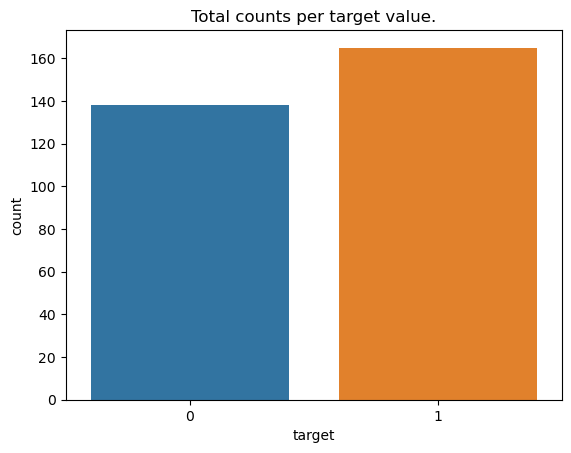

In [276]:
plt.title("Total counts per target value.")
sns.countplot(x='target',data=df);

### Pairplot that displays relationships between following columns:
- age
- trestbps
- chol 
- thalach
- target

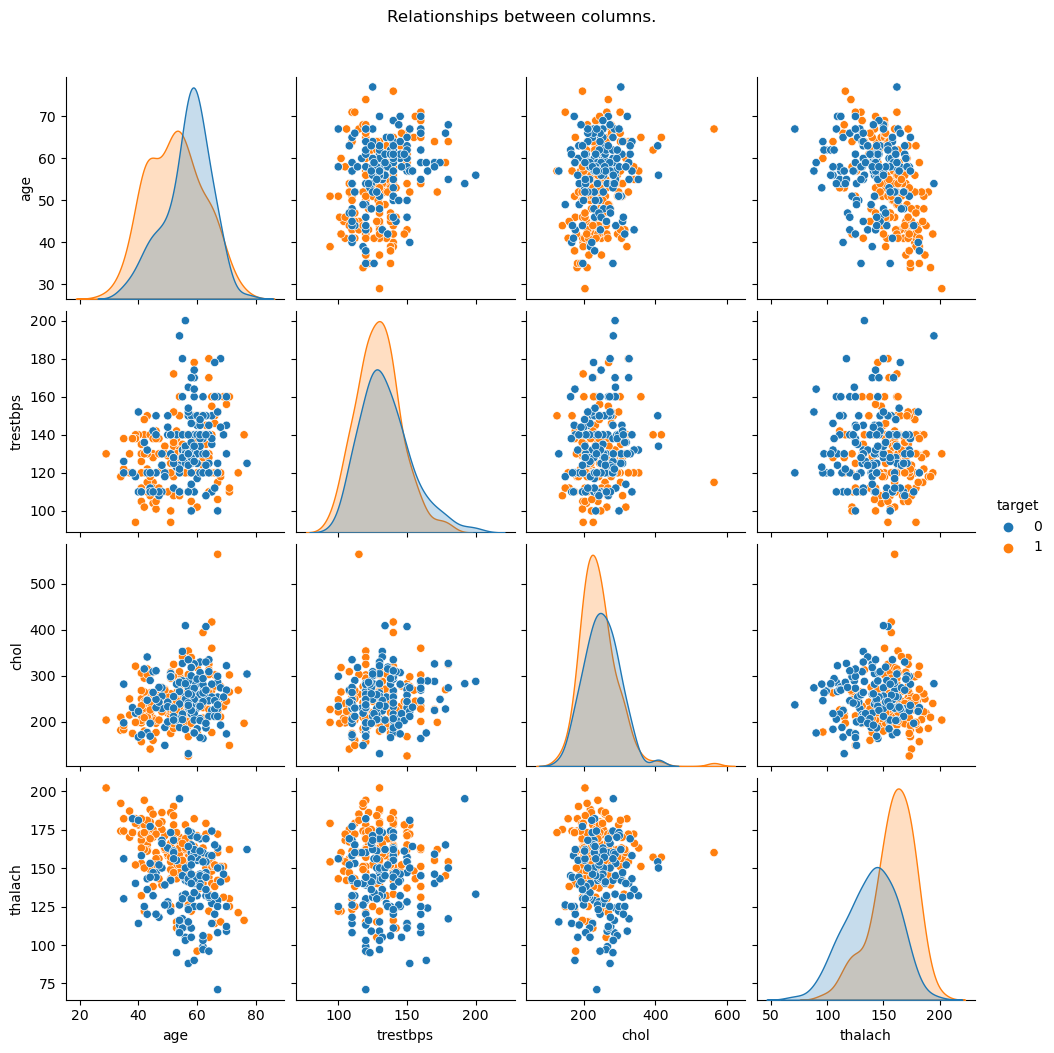

In [277]:
g = sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')
g.fig.suptitle("Relationships between columns.", y=1.05);

### Heatmap with correlation between all the columns.

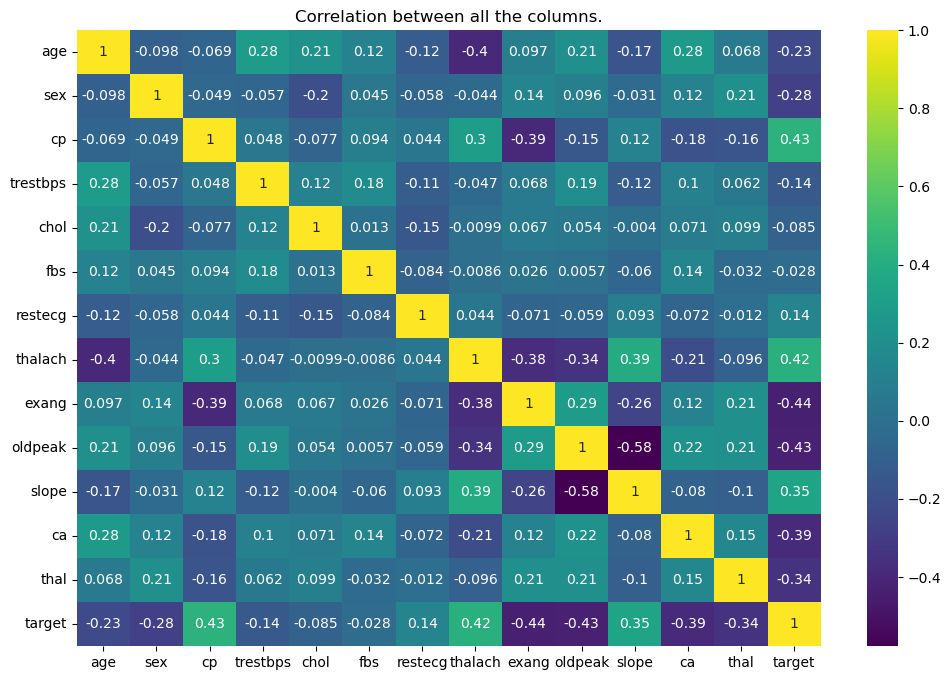

In [278]:
plt.figure(figsize=(12,8))
plt.title("Correlation between all the columns.")
sns.heatmap(df.corr(),cmap='viridis',annot=True);

***
# 3. Data Preparation

### Importing functions.

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Separating the features from the labels into 2 objects, X and y.

In [280]:
X = df.drop('target',axis=1)
y = df['target']

### Performing a train test split on the data, with the test size of 10%.

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Creating StandardScaler and scaling the data.

In [282]:
scaler = StandardScaler()

In [283]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***
## 4. Logistic Regression Model

### Importing model function.

In [284]:
from sklearn.linear_model import LogisticRegressionCV 

### Creting a model with built in Cross Validation to find best hyperparameters.

In [285]:
model = LogisticRegressionCV(Cs=np.logspace(0, 4, 10), solver='saga', penalty='elasticnet', l1_ratios=np.linspace(0, 1, 10))

### Training the model.

In [286]:
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                     l1_ratios=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                     penalty='elasticnet', solver='saga')

### Optimal parameters that the model found.

In [287]:
model.C_

array([1.])

In [288]:
model.l1_ratio_

array([0.66666667])

## Model's coeffictients.

In [289]:
model.coef_

array([[-0.0560732 , -0.7096406 ,  0.88983202, -0.24692784, -0.19531143,
         0.01716597,  0.10402798,  0.42566539, -0.41516835, -0.52467334,
         0.36598896, -0.83859618, -0.56775652]])

### Visualization of coefficients.

In [290]:
coefs = pd.Series(index=X.columns,data=model.coef_[0])

In [291]:
coefs = coefs.sort_values()

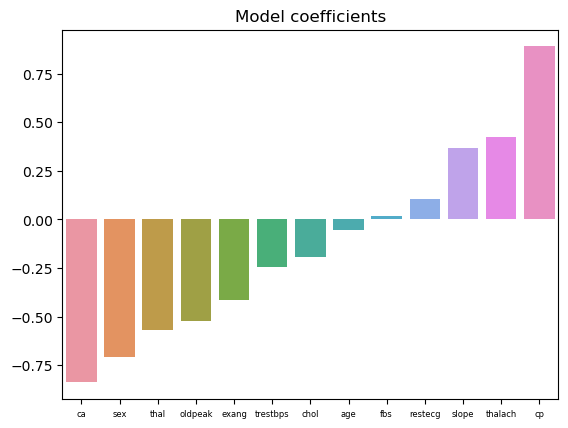

In [292]:
plt.xticks(size=6)
plt.title("Model coefficients")
sns.barplot(x=coefs.index, y=coefs.values);

***
## 5. Model Performance Evaluation

Let's now evaluate your model on the remaining 10% of the data, the test set.

### Calculation of predicted values

In [293]:
y_pred = model.predict(X_test)

### Confusion Matrix Plot


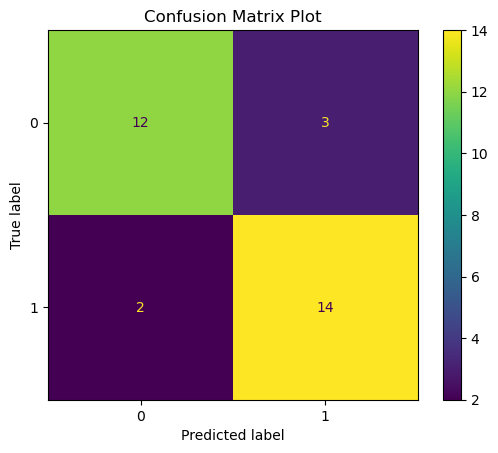

In [294]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matrix Plot");

We can see that we have a small amount of false values.

### Classification Report

In [295]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Perormance Curves

### Imports

In [296]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

### Precision Recall Curve

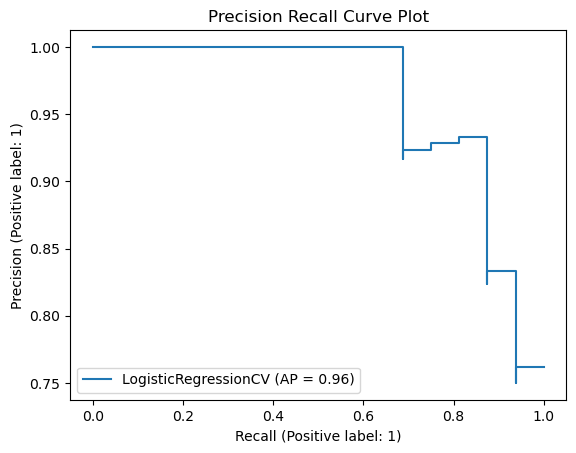

In [297]:
plot_precision_recall_curve(model,X_test,y_test)
plt.title("Precision Recall Curve Plot");

### ROC Curve

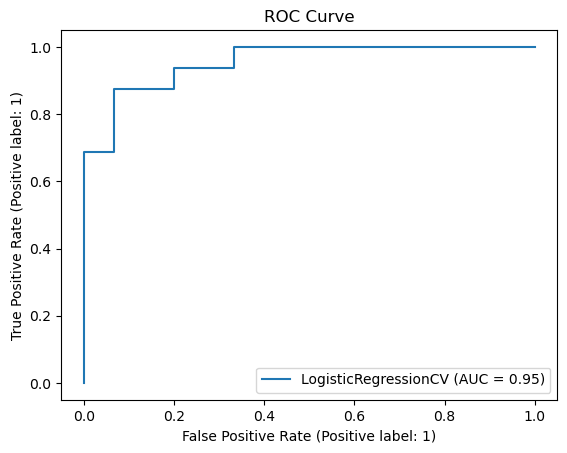

In [298]:
plot_roc_curve(model, X_test, y_test)
plt.title("ROC Curve");

***
## 6. Model Performance on fictitious patient

### Patient Data.

In [299]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

### Model Prediction.

In [300]:
model.predict(patient)

array([0], dtype=int64)

Model predicited target 0 which means no presence of heart disease.


### Model Probability Precision.

In [301]:
model.predict_proba(patient)

array([[1.00000000e+00, 3.82770093e-20]])

The model calculated the probability of the target 0 at almost 1, which indicates almost certainty.